In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score



# Load your dataset 
data = pd.read_csv('cleaneded_main_model_data.csv')

# Define selected features and target variable
selected_features = ['T (K)', 'P (MPa)', 'methane', 'ethane', 'propane',
                     'ibutane', 'ipentane', 'hexane', 'heptane', 'helium',
                     'oxygen', 'H2S', 'CO2']
target_variable = ['z']

# Extract the selected features and target variable
X = data[selected_features]
y = data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
# Create and train the SGDBoost model
model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)


C:\Users\okola\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [3]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.9f}%")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 6.241346856154456e-05
Mean Absolute Percentage Error (MAPE): 0.006264888%
Root Mean Square Error (RMSE): 0.00011241315251375959
R-squared (R2): 0.9887873444296308


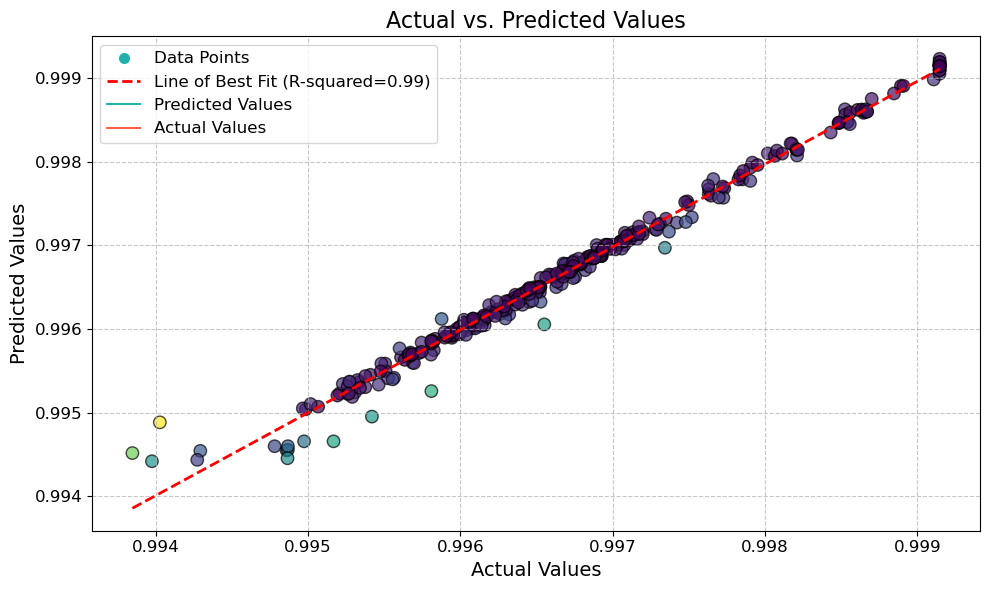

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.lines import Line2D  # Import Line2D

# Convert y_test and y_pred to NumPy arrays and ensure they are 1D arrays
y_test = np.array(y_test).ravel()
y_pred = np.array(y_pred).ravel()

# Create a visually appealing scatter plot
plt.figure(figsize=(10, 6))

# Calculate the absolute errors between actual and predicted values
errors = np.abs(y_test - y_pred)

# Define custom colors using a colormap for data points based on the error magnitude
cmap = plt.get_cmap('viridis')  # Choose a colormap
custom_colors = cmap(errors / errors.max())

# Use clear markers for data points and adjust marker size
plt.scatter(y_test, y_pred, s=80, c=custom_colors, edgecolors='k', marker='o', alpha=0.7, label='Data Points')

# Add a line of best fit with improved styling
slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)
line_x = np.array([y_test.min(), y_test.max()])
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='red', linestyle='--', lw=2, label=f'Line of Best Fit (R-squared={r_value**2:.2f})')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set a white background color for a clean and bright look
plt.gca().set_facecolor('white')

# Create a custom legend
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightseagreen',
           markersize=8, markeredgewidth=0, markeredgecolor='k', label='Data Points'),
    Line2D([0], [0], color='red', linestyle='--', linewidth=2, label=f'Line of Best Fit (R-squared={r_value**2:.2f})')
]

# Add labels for Predicted and Actual Values to the legend
custom_legend += [Line2D([0], [0], color='lightseagreen', label='Predicted Values'),
                  Line2D([0], [0], color='tomato', label='Actual Values')]

plt.legend(handles=custom_legend, fontsize=12)

plt.tight_layout()
plt.show()


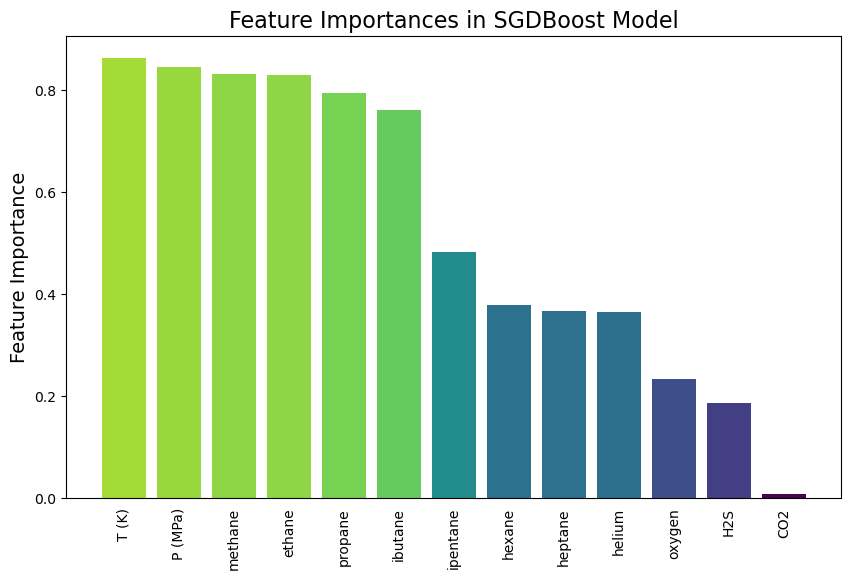

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
selected_features = ['T (K)', 'P (MPa)', 'methane', 'ethane',
                     'propane', 'ibutane', 'ipentane', 'hexane',
                     'heptane', 'helium', 'oxygen', 'H2S', 'CO2']
feature_importances = np.random.rand(len(selected_features))  

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = [feature_importances[i] for i in sorted_indices]

# Define a custom color scale for feature importance
colors = plt.get_cmap('viridis')(sorted_importances)

# Vertical bar chart
bars = ax.bar(selected_features, sorted_importances, color=colors)

# Rotate x-axis tick labels vertically
plt.xticks(rotation=90)

# Hide the x-axis labels and set the y-axis label
ax.set_xlabel('')
ax.set_ylabel('Feature Importance', fontsize=14)

# Remove the default x-axis tick lines
ax.tick_params(axis='x', which='both', bottom=False)

plt.title('Feature Importances in SGDBoost Model', fontsize=16)
plt.show()


In [6]:
# Create a DataFrame for the model's predictions
predictions_df = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred})

# Save predictions to a CSV file
predictions_df.to_csv('SGDBoost_pred_values.csv', index=False)
